# Credit Model

Quant Finance Project

Objective: Estimating a Risk Factor Model

## Setting up the environment

In [29]:
# Installing packages

# %pip install pandas_datareader



In [30]:
# Importing packages
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader as pdr


## Testing the code

In [31]:
pdr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [32]:
start = '1990-01-01'

In [33]:
ff = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors', freq='M', start=start).read()

In [34]:
ff_df = ff[0]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

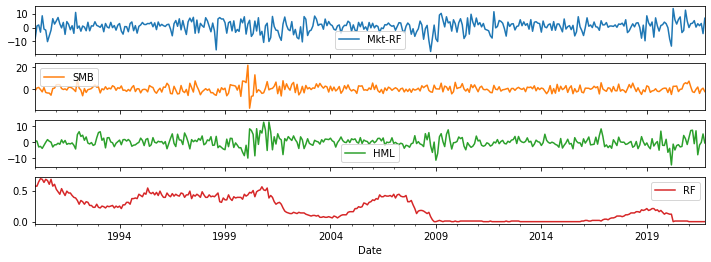

In [35]:
ff_df.plot(subplots=True,figsize=(12,4))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

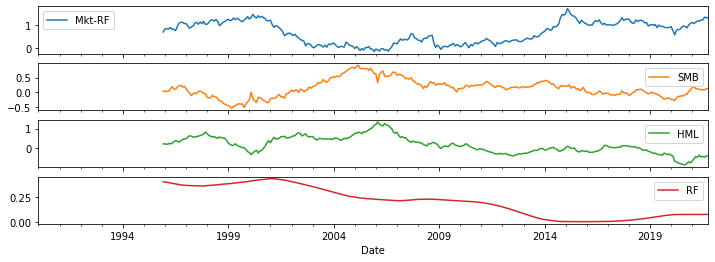

In [36]:
ff_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

### Fama French Momentum

In [37]:
ff_mom_df = pdr.famafrench.FamaFrenchReader('F-F_Momentum_Factor', freq='M', start=start).read()[0]

array([<AxesSubplot:xlabel='Date'>], dtype=object)

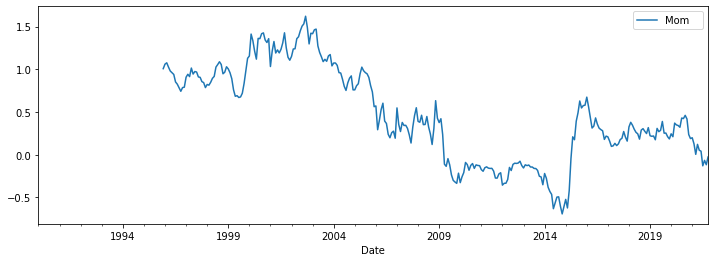

In [38]:
ff_mom_df.rolling(72).mean().plot(subplots=True,figsize=(12,4))

In [39]:
# Displaying the Fama French data frame
ff_df

,Mkt-RF,SMB,HML,RF
Date,,,,
1990-01,-7.85,-1.25,0.85,0.57
1990-02,1.11,0.97,0.64,0.57
1990-03,1.83,1.46,-2.92,0.64
1990-04,-3.36,-0.45,-2.59,0.69
1990-05,8.42,-2.56,-3.83,0.68
...,...,...,...,...
2021-06,2.75,1.80,-7.76,0.00
2021-07,1.27,-3.96,-1.75,0.00
2021-08,2.90,-0.48,-0.13,0.00


In [40]:
# Displaying the Fama French Momentum data frame
ff_mom_df

,Mom
Date,
1990-01,-3.27
1990-02,-0.54
1990-03,1.80
1990-04,2.39
1990-05,3.03
...,...
2021-06,2.24
2021-07,-2.29
2021-08,2.52


In [41]:
# Merging the Fama French data frame with the Fama French Momentum data frame on inner merge
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on = 'Date', how ='inner', sort = True, copy = True, indicator = False, validate = 'one_to_one')

In [42]:
# Displaying the Fama French Merged
ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1990-01,-7.85,-1.25,0.85,0.57,-3.27
1990-02,1.11,0.97,0.64,0.57,-0.54
1990-03,1.83,1.46,-2.92,0.64,1.80
1990-04,-3.36,-0.45,-2.59,0.69,2.39
1990-05,8.42,-2.56,-3.83,0.68,3.03
...,...,...,...,...,...
2021-06,2.75,1.80,-7.76,0.00,2.24
2021-07,1.27,-3.96,-1.75,0.00,-2.29
2021-08,2.90,-0.48,-0.13,0.00,2.52


In [43]:
# %pip install yfinance

In [44]:
import yfinance as yf
yf.pdr_override()

In [50]:
# Collecting data

AAPL_data = pdr.data.get_data_yahoo('AAPL', start=start)

[*********************100%***********************]  1 of 1 completed


In [51]:
# Pulling Apple (AAPL) data from Yahoo Finance

# Pulling Adjusted Close Monthly - using percent change method

AAPL_data = pdr.data.get_data_yahoo('AAPL', start=start)['Adj Close'].resample('M').ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [52]:
# Displaying AAPL data

AAPL_data

Date
1990-01-31         NaN
1990-02-28    0.003222
1990-03-31    0.183825
1990-04-30   -0.021738
1990-05-31    0.050526
                ...   
2021-08-31    0.042489
2021-09-30   -0.068037
2021-10-31    0.058657
2021-11-30    0.105082
2021-12-31    0.035330
Freq: M, Name: Adj Close, Length: 384, dtype: float64

In [55]:
# Converting to data frame

AAPL_df = AAPL_data.to_frame()

# Displaying AAPL_df

AAPL_df

,Adj Close
Date,
1990-01-31,NaN
1990-02-28,0.003222
1990-03-31,0.183825
1990-04-30,-0.021738
1990-05-31,0.050526
...,...
2021-08-31,0.042489
2021-09-30,-0.068037
2021-10-31,0.058657


In [56]:
AAPL_df.index.dtype

dtype('<M8[ns]')

In [57]:
ffac_merged_df.index.dtype

period[M]

In [61]:
# Reformatting date

AAPL_df['str_date'] = AAPL_df.index.astype(str)
AAPL_df['dt_date'] = pd.to_datetime(AAPL_df['str_date']).dt.strftime('%Y-%m')

# Checking data type of new created variable

AAPL_df.dt_date.dtype

dtype('O')

In [63]:
# Do the same for risk factor database

ffac_merged_df['str_date'] = ffac_merged_df.index.astype(str)

ffac_merged_df['dt_date'] = pd.to_datetime(ffac_merged_df['str_date']).dt.strftime('%Y-%m')

# Checking data type of new created variable

ffac_merged_df.dt_date.dtype

dtype('O')

In [65]:
# Performing a merge

AAPL_ffac_merge_df = pd.merge(AAPL_df,ffac_merged_df, how = 'inner', on = 'dt_date', sort = True, copy = True, indicator = False, validate = 'one_to_one')

AAPL_ffac_merge_df

,Adj Close,str_date_x,dt_date,Mkt-RF,SMB,HML,RF,Mom,str_date_y
0,NaN,1990-01-31,1990-01,-7.85,-1.25,0.85,0.57,-3.27,1990-01
1,0.003222,1990-02-28,1990-02,1.11,0.97,0.64,0.57,-0.54,1990-02
2,0.183825,1990-03-31,1990-03,1.83,1.46,-2.92,0.64,1.80,1990-03
3,-0.021738,1990-04-30,1990-04,-3.36,-0.45,-2.59,0.69,2.39,1990-04
4,0.050526,1990-05-31,1990-05,8.42,-2.56,-3.83,0.68,3.03,1990-05
...,...,...,...,...,...,...,...,...,...
377,0.099109,2021-06-30,2021-06,2.75,1.80,-7.76,0.00,2.24,2021-06
378,0.064982,2021-07-31,2021-07,1.27,-3.96,-1.75,0.00,-2.29,2021-07
379,0.042489,2021-08-31,2021-08,2.90,-0.48,-0.13,0.00,2.52,2021-08
380,-0.068037,2021-09-30,2021-09,-4.37,0.80,5.09,0.00,1.57,2021-09


In [66]:
AAPL_ffac_merge_df.drop(columns=['str_date_x','str_date_y'], inplace=True)

In [67]:
AAPL_ffac_merge_df.rename(columns={'Adj Close':'AAPL'}, inplace=True)

In [68]:
# Risk-free rate

AAPL_ffac_merge_df['AAPL_RF'] = AAPL_ffac_merge_df['AAPL']*100-AAPL_ffac_merge_df['RF']

In [69]:
AAPL_ffac_merge_df

,AAPL,dt_date,Mkt-RF,SMB,HML,RF,Mom,AAPL_RF
0,NaN,1990-01,-7.85,-1.25,0.85,0.57,-3.27,NaN
1,0.003222,1990-02,1.11,0.97,0.64,0.57,-0.54,-0.247844
2,0.183825,1990-03,1.83,1.46,-2.92,0.64,1.80,17.742520
3,-0.021738,1990-04,-3.36,-0.45,-2.59,0.69,2.39,-2.863818
4,0.050526,1990-05,8.42,-2.56,-3.83,0.68,3.03,4.372561
...,...,...,...,...,...,...,...,...
377,0.099109,2021-06,2.75,1.80,-7.76,0.00,2.24,9.910928
378,0.064982,2021-07,1.27,-3.96,-1.75,0.00,-2.29,6.498235
379,0.042489,2021-08,2.90,-0.48,-0.13,0.00,2.52,4.248930
380,-0.068037,2021-09,-4.37,0.80,5.09,0.00,1.57,-6.803659


In [71]:
# Dropping Null values
AAPL_ffac_merge_df.dropna(axis=0, inplace=True)

## Regression

In [73]:
# %pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\pnguy\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [78]:
from statsmodels.api import OLS

# Renaming Mom

AAPL_ffac_merge_df.rename(columns={'Mom   ':'MOM'}, inplace=True)


# Running and fitting OLS regression
results = OLS(AAPL_ffac_merge_df['AAPL_RF'], AAPL_ffac_merge_df[['Mkt-RF','SMB','HML','MOM']], missing='drop').fit()

In [79]:
# Displaying results

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                AAPL_RF   R-squared (uncentered):                   0.281
Model:                            OLS   Adj. R-squared (uncentered):              0.274
Method:                 Least Squares   F-statistic:                              36.88
Date:                Fri, 17 Dec 2021   Prob (F-statistic):                    5.02e-26
Time:                        18:50:12   Log-Likelihood:                         -1441.4
No. Observations:                 381   AIC:                                      2891.
Df Residuals:                     377   BIC:                                      2907.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.2075      0.134      9.009      0.000       0.944       1.471
SMB            0.2717      0.181      1.498      0.135      -0.085       0.628
HML           -0.8926      0.185     -4.832      0.000      -1.256      -0.529
MOM           -0.1183      0.124     -0.957      0.339      -0.361       0.125
==============================================================================
Omnibus:                       14.948   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               34.776
Skew:                          -0.024   Prob(JB):                     2.81e-08
Kurtosis:                       4.479   Cond. No.                         1.91
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Adding constant because OLS model removes the constant

import statsmodels.tools
AAPL_ffac_merge_df_c = statsmodels.tools.add_constant(AAPL_ffac_merge_df, prepend=True)
AAPL_ffac_merge_df_c

,const,AAPL,dt_date,Mkt-RF,SMB,HML,RF,MOM,AAPL_RF
1,1.0,0.003222,1990-02,1.11,0.97,0.64,0.57,-0.54,-0.247844
2,1.0,0.183825,1990-03,1.83,1.46,-2.92,0.64,1.80,17.742520
3,1.0,-0.021738,1990-04,-3.36,-0.45,-2.59,0.69,2.39,-2.863818
4,1.0,0.050526,1990-05,8.42,-2.56,-3.83,0.68,3.03,4.372561
5,1.0,0.084849,1990-06,-1.09,1.36,-1.93,0.63,2.40,7.854893
...,...,...,...,...,...,...,...,...,...
377,1.0,0.099109,2021-06,2.75,1.80,-7.76,0.00,2.24,9.910928
378,1.0,0.064982,2021-07,1.27,-3.96,-1.75,0.00,-2.29,6.498235
379,1.0,0.042489,2021-08,2.90,-0.48,-0.13,0.00,2.52,4.248930
380,1.0,-0.068037,2021-09,-4.37,0.80,5.09,0.00,1.57,-6.803659


In [85]:
# Running results again with the new data frame containing the constant

results = OLS(AAPL_ffac_merge_df_c['AAPL_RF'], AAPL_ffac_merge_df_c[['const','Mkt-RF','SMB','HML','MOM']], missing='drop').fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                AAPL_RF   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     35.03
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           7.18e-25
Time:                        18:54:01   Log-Likelihood:                -1437.6
No. Observations:                 381   AIC:                             2885.
Df Residuals:                     376   BIC:                             2905.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5453      0.561      2.755      0.006       0.443       2.648
Mkt-RF         1.1263      0.136      8.275      0.000       0.859       1.394
SMB            0.2698      0.180      1.500      0.134      -0.084       0.623
HML           -0.9397      0.184     -5.109      0.000      -1.301      -0.578
MOM           -0.1781      0.124     -1.431      0.153      -0.423       0.067
==============================================================================
Omnibus:                       14.551   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               33.181
Skew:                          -0.032   Prob(JB):                     6.24e-08
Kurtosis:                       4.444   Cond. No.                         5.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see by looking at the p-values that SMB and MOM are insignificant.

Mkt-RF: Significant exposure to the market of about 1.13

SMB: Insignificant exposure to size

HML: Negative significant exposure to value - makes sense since AAPL is a growth stock

MOM: Insignificant exposure to momentum

R-squared: 27.1% of the variability in AAPL's return can be explained by the variables - fairly big idiosyncratic component